<a href="https://colab.research.google.com/github/zhChenOuO/stock_ml_exercise/blob/master/01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install finlab_crypto > log.txt

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
import finlab_crypto

finlab_crypto.setup()

|------------------------------
| Google Drive not connected!  
|------------------------------
|
| Please connect google drive:
Mounted at /content/drive


In [5]:
ohlcv = finlab_crypto.crawler.get_all_binance('BTCUSDT','4h')

All caught up..!


In [6]:
ohlcv.head()

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2017-08-17 04:00:00+00:00,4261.48,4349.99,4261.32,4349.99,82.088865,1.502957e+12,3.531943e+05,334.0,64.013727,275647.421911,8048.127886
2017-08-17 08:00:00+00:00,4333.32,4485.39,4333.32,4427.30,63.619882,1.502971e+12,2.825012e+05,248.0,58.787633,261054.051154,8020.698096
2017-08-17 12:00:00+00:00,4436.06,4485.39,4333.42,4352.34,174.562001,1.502986e+12,7.742388e+05,858.0,125.184133,555419.758061,8133.190658
2017-08-17 16:00:00+00:00,4352.33,4354.84,4200.74,4325.23,225.109716,1.503000e+12,9.652911e+05,986.0,165.036363,707808.200922,8425.112852
2017-08-17 20:00:00+00:00,4307.56,4369.69,4258.56,4285.08,249.769913,1.503014e+12,1.079545e+06,1001.0,203.226685,878286.968557,8733.911395


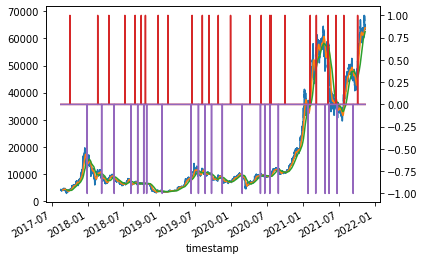

In [31]:
# 使用收盤價做 雙均線策略

close = ohlcv.close
sma20 = close.rolling(60).mean()
sma60 = close.rolling(180).mean()

entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())

close.plot()
sma20.plot()
sma60.plot()

entries.astype(int).plot(secondary_y=True)
(-exits.astype(int)).plot(secondary_y=True)

In [61]:
import vectorbt as vbt
import numpy as np

np.arange(20,300,10)

array([ 20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140,
       150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270,
       280, 290])

In [32]:
portfolio = vbt.Portfolio.from_signals(close,entries,exits,freq='4h')

In [33]:
portfolio.annual_returns()

2017-08-17 00:00:00+00:00    1.520345
2018-08-17 00:00:00+00:00    0.834811
2019-08-17 00:00:00+00:00    0.533409
2020-08-16 00:00:00+00:00    2.020252
2021-08-16 00:00:00+00:00    0.188180
Freq: 365D, Name: close, dtype: float64

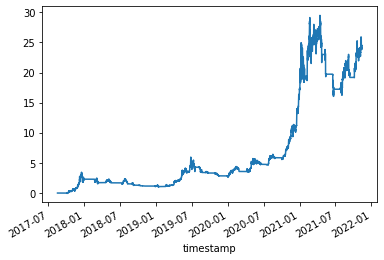

In [34]:
portfolio.cumulative_returns().plot()

In [68]:
from finlab_crypto import Strategy

@Strategy(sma1=60,sma2=120)
def sma_strategy(ohlcv):
  close = ohlcv.close
  sma20 = close.rolling(sma_strategy.sma1).mean()
  sma60 = close.rolling(sma_strategy.sma2).mean()

  entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
  exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())

  figures = {
      'overlaps':{
          'sma1': sma20,
          'sma2': sma60
      }
  }
  
  return entries,exits,figures


  0%|          | 0/841 [00:00<?, ?it/s]

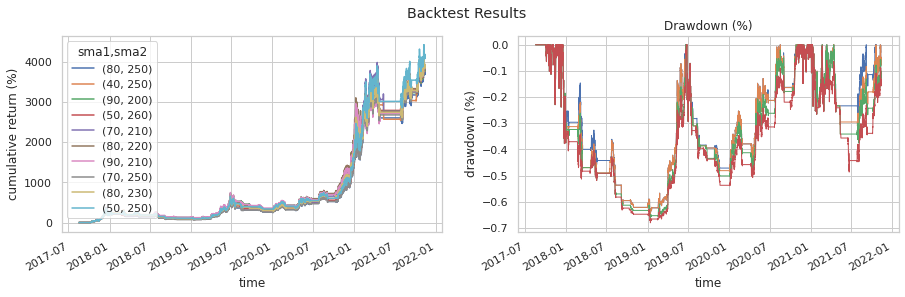

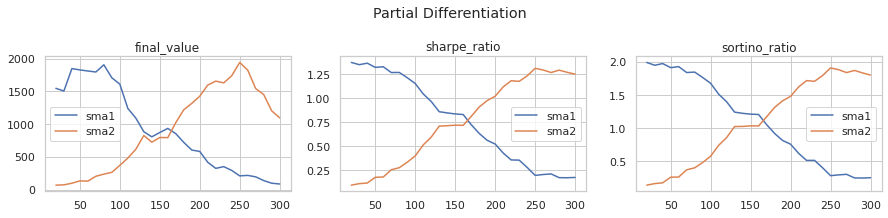

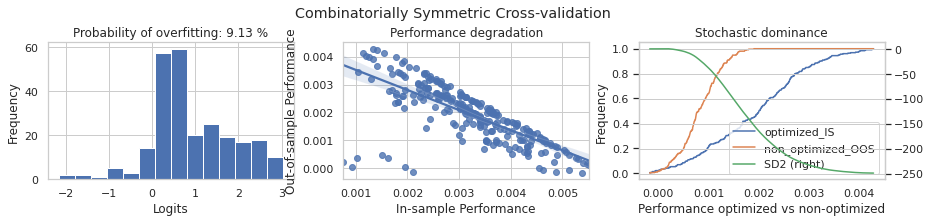

Output()

In [70]:
var={'sma1':np.arange(20,310,10),'sma2':np.arange(20,310,10)}

portfolio = sma_strategy.backtest(ohlcv, freq='4h',plot=True,variables=var)